# ohsome quality analyst (OQT) 

OQT provides quality estimations of OpenStreetMap (OSM) data.
OQT calls those estimations Indicators.
Indicators are computed for a specific area (`bpolys`) and a certain set of aggregated OSM features (`layer`).

Two intrinsic quality estimation OQT offers are the Mapping Saturation indicator and the Currentness indicator.

## API Request Examples using Python

Below Python is used to make requests to the OQT API.

### Mapping Saturation Indicator

The Mapping Saturation indicator calculate the saturation of mapping activity within the last 3 years.
It is based on the premise that each aggregation of features (e.g. length of roads or count of buildings) has a maximum. After increased mapping activity saturation is reached near this maximum.
The Mapping Saturation indicator works well with following layers:

- Building Count (`building_count`)
- Major Roads Length (`major_roads_length`)
- Amenities (`amenities`)
- Point-of-Interests (`poi`)

In [1]:
# Helper function to display OQT API response.

import json

from IPython.display import SVG, display
import requests
from termcolor import colored


def display_results(feature):
    name = feature["properties"]["name"]
    label = feature["properties"]["result"]["label"]
    color = feature["properties"]["result"]["label"]
    description = feature["properties"]["result"]["description"]
    svg = feature["properties"]["result"]["svg"]

    # print(json.dumps(result, indent=4))
    print(name)
    print("-" * len(name))
    print("Quality Label: " + colored(label, color))
    print("Result Description: " + description)
    display(SVG(svg))

Berlin
------
Quality Label: green
Result Description: The saturation of the last 3 years is 98.75%.
High saturation has been reached (97% < Saturation ≤ 100%).



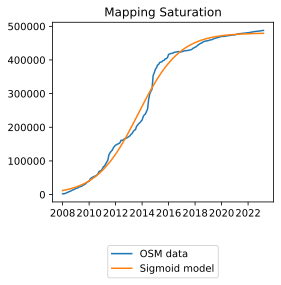

In [18]:
import json

import requests


base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

with open("germany-berlin.geojson", "r") as file:
    bpolys = json.load(file)

parameters = {
    "name": "MappingSaturation",
    "layerKey": "building_count",
    "bpolys": bpolys,
    "includeSvg": True,
}

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

display_results(response.json())

### Currentness Indicator

The Currentness indicator works well with following layers:

- Building Count (`building_count`)
- Major Roads Count (`major_roads_count`)
- Amenities (`amenities`)

Berlin
------
Quality Label: yellow
Result Description: In the last 3 years 29.51 % of the elements were edited the last time.
In the period from 4 to 7 years ago 26.82 % of the elements were edited the last time.
The remaining 43.67 % were last edited more than 8 years ago.
The median currentness of the 554099 features (Building Count) is 6 year(s).
It is likely that some features are up-to-date and some features are outdated.



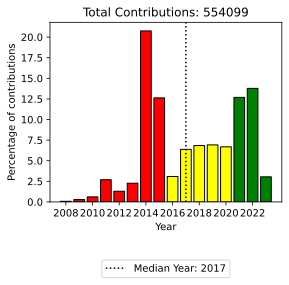

In [19]:
import json

import requests


base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

with open("germany-berlin.geojson", "r") as file:
    bpolys = json.load(file)

parameters = {
    "name": "Currentness",
    "layerKey": "building_count",
    "bpolys": bpolys,
    "includeSvg": True,
}

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

display_results(response.json())

### Mapping Saturation Indicator for all districts in Berlin

The previous requests have been about one Area-of-Intrest


Lichtenberg
-----------
Quality Label: yellow
Result Description: The saturation of the last 3 years is 94.93%.
Saturation is in progress (30% < Saturation ≤ 97%).



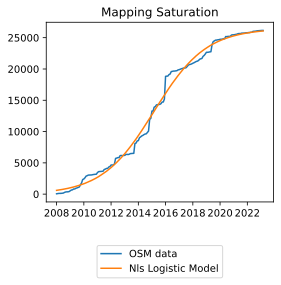

Charlottenburg-Wilmersdorf
--------------------------
Quality Label: yellow
Result Description: The saturation of the last 3 years is 92.57%.
Saturation is in progress (30% < Saturation ≤ 97%).



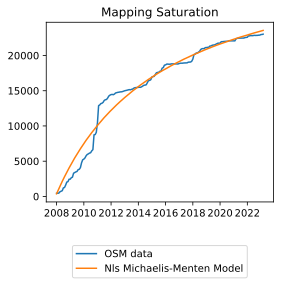

Pankow
------
Quality Label: green
Result Description: The saturation of the last 3 years is 100.0%.
High saturation has been reached (97% < Saturation ≤ 100%).



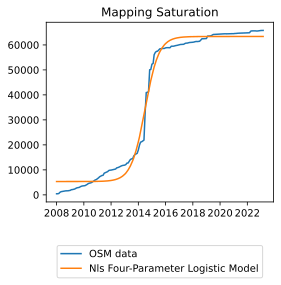

Marzahn-Hellersdorf
-------------------
Quality Label: green
Result Description: The saturation of the last 3 years is 99.92%.
High saturation has been reached (97% < Saturation ≤ 100%).



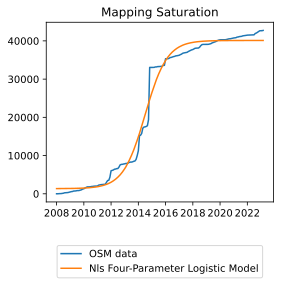

Neukölln
--------
Quality Label: green
Result Description: The saturation of the last 3 years is 99.3%.
High saturation has been reached (97% < Saturation ≤ 100%).



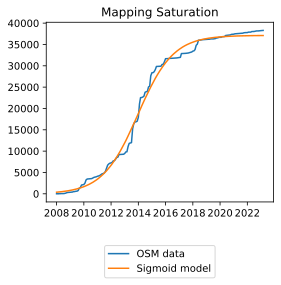

Tempelhof-Schöneberg
--------------------
Quality Label: green
Result Description: The saturation of the last 3 years is 99.8%.
High saturation has been reached (97% < Saturation ≤ 100%).



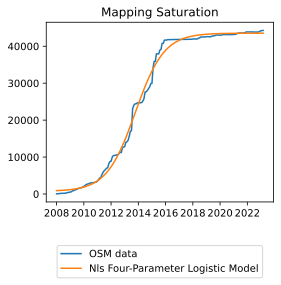

Friedrichshain-Kreuzberg
------------------------
Quality Label: yellow
Result Description: The saturation of the last 3 years is 95.3%.
Saturation is in progress (30% < Saturation ≤ 97%).



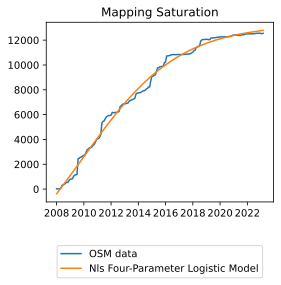

Treptow-Köpenick
----------------
Quality Label: green
Result Description: The saturation of the last 3 years is 99.2%.
High saturation has been reached (97% < Saturation ≤ 100%).



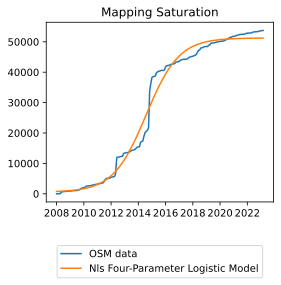

Steglitz-Zehlendorf
-------------------
Quality Label: green
Result Description: The saturation of the last 3 years is 99.0%.
High saturation has been reached (97% < Saturation ≤ 100%).



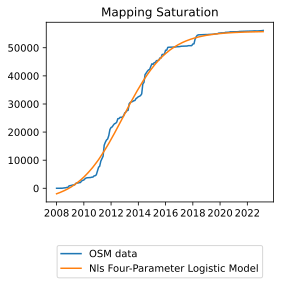

Mitte
-----
Quality Label: yellow
Result Description: The saturation of the last 3 years is 92.16%.
Saturation is in progress (30% < Saturation ≤ 97%).



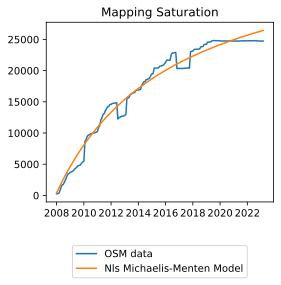

Spandau
-------
Quality Label: green
Result Description: The saturation of the last 3 years is 99.16%.
High saturation has been reached (97% < Saturation ≤ 100%).



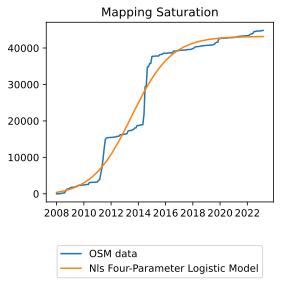

Reinickendorf
-------------
Quality Label: green
Result Description: The saturation of the last 3 years is 98.81%.
High saturation has been reached (97% < Saturation ≤ 100%).



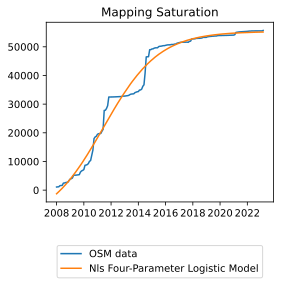

In [20]:
import json

import requests


base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

# load districts as GeoJSON FeatureCollection
with open("germany-berlin-districts.geojson", "r") as file:
    bpolys = json.load(file)

parameters = {
    "name": "MappingSaturation",
    "layerKey": "building_count",
    "bpolys": bpolys,
    "includeSvg": True,
}

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

features = response.json()["features"]
for feature in features:
    display_results(feature)

### ohsome API

An API for analysing OpenStreetMap history data. OQT uses the ohsome API to retrive aggregated statistics about OSM for making quality estimations.

For example the Mapping Saturation Indicator needs the counts (or length) of features at particular timeintervals to find the best fitting curve which describes the saturation:

```python
[
    {
        "timestamp": "2014-01-01T00:00:00Z",
        "value": 432.0  # number of features
    },
    ...
]
```

It is possible to give those data points directly to OQT which then computes the Mapping Saturation Indicator for those instead of quering the ohsome API.

In [2]:
import json

from datetime import datetime

import requests


base_url = "https://api.ohsome.org/v1"
endpoint = "/elements/count"
url = base_url + endpoint

with open("germany-berlin.geojson", "r") as file:
    bpolys = json.load(file)

parameters = {
    "bpolys": json.dumps(bpolys),  # pass GeoJSON as string.
    "filter": "highway=cycleway",
    "format": "json",
    "time": "2014-01-01/2022-01-01/P1Y",
}
headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded",
}
    
response = requests.post(url, data=parameters, headers=headers)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

print(json.dumps(response.json(), indent=4))  # Pretty print response

result = response.json()["result"]

# TODO: Request to ohsome API and send data to OQT API
# one for highway=cycleway 
# one for cycleway=* (insbesondere cycleway=lane) bzw. präziser cycleway:both=* oder cycleway:right=* oder cycleway:left=* 
# see also https://wiki.openstreetmap.org/wiki/Berlin/Verkehrswende/Radwege

Response:
{
    "attribution": {
        "url": "https://ohsome.org/copyrights",
        "text": "\u00a9 OpenStreetMap contributors"
    },
    "apiVersion": "1.9.0",
    "result": [
        {
            "timestamp": "2014-01-01T00:00:00Z",
            "value": 432.0
        },
        {
            "timestamp": "2015-01-01T00:00:00Z",
            "value": 461.0
        },
        {
            "timestamp": "2016-01-01T00:00:00Z",
            "value": 362.0
        },
        {
            "timestamp": "2017-01-01T00:00:00Z",
            "value": 365.0
        },
        {
            "timestamp": "2018-01-01T00:00:00Z",
            "value": 438.0
        },
        {
            "timestamp": "2019-01-01T00:00:00Z",
            "value": 452.0
        },
        {
            "timestamp": "2020-01-01T00:00:00Z",
            "value": 486.0
        },
        {
            "timestamp": "2021-01-01T00:00:00Z",
            "value": 766.0
        },
        {
            "timestamp": "2022-

#### Plot the results

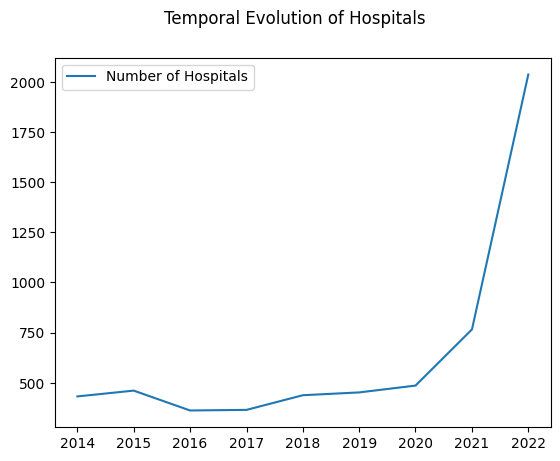

In [3]:
import matplotlib.pyplot as plt


dates = []
values = []
for r in result:
    year = datetime.fromisoformat(r["timestamp"].replace("Z", ""))
    dates.append(year)
    values.append(r["value"])

fig, ax = plt.subplots()
ax.plot(dates, values, label="Number of Hospitals")
ax.legend()
fig.suptitle("Temporal Evolution of Hospitals")
plt.show()